In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.optimize import curve_fit


In [96]:
df_age_causes = pd.DataFrame()

In [97]:
for i in [
    'all-causes',\
    'communicable-maternal-perinatal-nutritional-conditions',\
    'noncommunicable-diseases',\
    'Injuries',\
    'defined-diseases',\
]:
    df = pd.read_csv(f"{i}.csv")
    df.drop([
        'Age Group',\
        'Percentage of cause-specific deaths out of total deaths',\
        'Region Code',\
        'Region Name',\
        'Country Name',\
            ], axis=1, inplace=True)
    df = df.rename(columns={'Death rate per 100 000 population':'Death rate'})
    #cleaning the data frame
    df_reduced = pd.DataFrame()
    df_reduced = df[(df['Year'] > 1959) & (df['Year'] < 2020)]
    df_reduced = df_reduced[df_reduced['Age group code'] != 'Age_unknown']
    #final data frame
    df_reduced =  df_reduced[(df_reduced['Country Code'] == 'JPN') | (df_reduced['Country Code'] == 'CHE')]
    df_reduced['causes'] = i
    df_age_causes = pd.concat([df_age_causes, df_reduced], ignore_index=True)

In [98]:


df = pd.read_csv("all-causes.csv")
df.drop([
    'Age Group',\
    'Percentage of cause-specific deaths out of total deaths',\
    'Region Code',\
    'Region Name',\
    'Country Name',\
        ], axis=1, inplace=True)
df = df.rename(columns={'Death rate per 100 000 population':'Death rate'})
#cleaning the data frame
df_reduced = pd.DataFrame()
df_reduced = df[(df['Year'] > 1959) & (df['Year'] < 2020)]
df_reduced = df_reduced[df_reduced['Age group code'] != 'Age_unknown']
#final data frame
df_reduced =  df_reduced[(df_reduced['Country Code'] == 'JPN') | (df_reduced['Country Code'] == 'CHE')]
df_reduced['causes'] = "all_causes"
df_age_causes = pd.concat([df_age_causes, df_reduced], ignore_index=True)

In [99]:
df_age_causes[(df_age_causes['Country Code'] == "CHE") & (df_age_causes['Year'] == 2018)]


,Country Code,Year,Sex,Age group code,Number,Age-standardized death rate per 100 000 standard population,Death rate,causes
6660,CHE,2018,All,Age_all,67088.0,312.355253,787.942303,all-causes
6661,CHE,2018,All,Age00,287.0,NaN,334.148329,all-causes
6662,CHE,2018,All,Age01_04,55.0,NaN,15.717699,all-causes
6663,CHE,2018,All,Age05_09,33.0,NaN,7.703171,all-causes
6664,CHE,2018,All,Age10_14,36.0,NaN,8.733709,all-causes
...,...,...,...,...,...,...,...,...
42715,CHE,2018,Female,Age65_69,1533.0,NaN,691.278527,all_causes
42716,CHE,2018,Female,Age70_74,2312.0,NaN,1112.720727,all_causes
42717,CHE,2018,Female,Age75_79,3208.0,NaN,1945.704651,all_causes
42718,CHE,2018,Female,Age80_84,5133.0,NaN,4029.010761,all_causes


In [100]:
def year_classification (year):
    if year < 1970 :
        return "1960-1970"
    elif year < 1980 :
        return "1970-1980"
    elif year < 1990 :
        return "1980-1990"
    elif year < 2000 :
        return "1990-2000"
    elif year < 2010 :
        return "2000-2010"
    elif year < 2020 :
        return "2010-2020"
    else :
        return None

In [101]:
df_age_causes['Year'] = df_age_causes['Year'].apply(year_classification)
df_age_causes

,Country Code,Year,Sex,Age group code,Number,Age-standardized death rate per 100 000 standard population,Death rate,causes
0,JPN,1960-1970,All,Age05_09,8209.0,NaN,89.183669,all-causes
1,JPN,1960-1970,All,Age10_14,5545.0,NaN,50.328565,all-causes
2,JPN,1960-1970,All,Age_all,706599.0,1048.155540,756.380160,all-causes
3,JPN,1960-1970,All,Age00,49293.0,NaN,3125.943307,all-causes
4,JPN,1960-1970,All,Age01_04,15399.0,NaN,245.696051,all-causes
...,...,...,...,...,...,...,...,...
43195,JPN,2010-2020,Female,Age10_14,203.0,NaN,7.467373,all_causes
43196,JPN,2010-2020,Female,Age05_09,199.0,NaN,7.745523,all_causes
43197,JPN,2010-2020,Female,Age01_04,345.0,NaN,17.685125,all_causes
43198,JPN,2010-2020,Female,Age00,874.0,NaN,188.314584,all_causes


In [102]:
df_age_causes.describe()

,Number,Age-standardized death rate per 100 000 standard population,Death rate
count,4.320000e+04,2160.000000,43200.000000
mean,1.591504e+04,280.461987,1017.109480
std,7.217064e+04,286.792340,3000.168891
min,0.000000e+00,5.264846,0.000000
25%,9.000000e+01,32.464724,13.879384
50%,6.535000e+02,165.209740,62.848612
75%,4.501250e+03,477.428382,436.770164
max,1.381093e+06,1249.502493,29223.728810


In [103]:
#getting the data for a ten year period (the first for loop)
df_1960_1970 = df_age_causes[df_age_causes['Year'] == "1960-1970"]
df_1970_1980 = df_age_causes[df_age_causes['Year'] == "1970-1980"]
df_1980_1990 = df_age_causes[df_age_causes['Year'] == "1980-1990"]
df_1990_2000 = df_age_causes[df_age_causes['Year'] == "1990-2000"]
df_2000_2010 = df_age_causes[df_age_causes['Year'] == "2000-2010"]
df_2010_2020 = df_age_causes[df_age_causes['Year'] == "2010-2020"]
  

In [104]:
unique_ages = sorted(df_age_causes['Age group code'].unique())
unique_genders = sorted(df_age_causes['Sex'].unique())
unique_causes = sorted(df_age_causes['causes'].unique())
unique_countries = sorted(df_age_causes['Country Code'].unique())
dfs = {}
for year in ["1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"] :
    df_extract = df_age_causes[df_age_causes['Year'] == year]
    df_name = f'df_{year}'
    dfs[df_name] = pd.DataFrame(columns = ['age','gender','cause','JPN_death_rate','CHE_death_rate'])
    for age in unique_ages:
        for gender in unique_genders:
            for cause in unique_causes:
                death_jpn = df_extract[
                    (df_extract['Age group code'] == age) &\
                    (df_extract['Sex'] == gender) &\
                    (df_extract['causes'] == cause) &\
                    (df_extract['Country Code'] == 'JPN')
                ]['Death rate'].sum()/10
                death_che = df_extract[
                    (df_extract['Age group code'] == age) &\
                    (df_extract['Sex'] == gender) &\
                    (df_extract['causes'] == cause) &\
                    (df_extract['Country Code'] == 'CHE')
                ]['Death rate'].sum()/10
                new_row = {
                    'age':age,
                    'gender':gender,
                    'cause':cause,
                    'JPN_death_rate':death_jpn,
                    'CHE_death_rate':death_che
                }
                dfs[df_name] = dfs[df_name].append(new_row, ignore_index=True)
                dfs[df_name]['age'] = dfs[df_name]['age'].apply(lambda x: x.replace("_", "").replace("Age", ""))


                    
                

In [105]:

# are the differences between women and men significant in different age groups 

significance_age = pd.DataFrame(columns=['year','cause','JPN_significant','CHE_significant'])
unique_causes = sorted(df_age_causes['causes'].unique())
unique_causes.remove('all_causes')
for key, data_frame in dfs.items():
    for cause in unique_causes:
        target = data_frame[data_frame['cause'] == 'all_causes']
        target.drop(target.tail(3).index,inplace = True)

        country = 'JPN_death_rate'
        male_data = target[target['gender'] == 'Male'][country]
        female_data = target[target['gender'] == 'Female'][country]

        # Perform the Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')

        # Check if the difference is significant
        alpha = 0.05  # Set your desired significance level
        if p_value < alpha:
            j = "Yes"
        else:
            j = "No"
        country = 'CHE_death_rate'
        male_data = target[target['gender'] == 'Male'][country]
        female_data = target[target['gender'] == 'Female'][country]

        # Perform the Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')

        # Check if the difference is significant
        alpha = 0.05  # Set your desired significance level
        if p_value < alpha:
            c = "Yes"
        else:
            c = "No"

        new_row = {
            'year': key,
            'cause': cause,
            'JPN_significant': j,
            'CHE_significant': c
        }

        significance_age = significance_age.append(new_row, ignore_index=True)

significance_age


,year,cause,JPN_significant,CHE_significant
0,df_1960-1970,Injuries,No,No
1,df_1960-1970,all-causes,No,No
2,df_1960-1970,communicable-maternal-perinatal-nutritional-co...,No,No
3,df_1960-1970,defined-diseases,No,No
4,df_1960-1970,noncommunicable-diseases,No,No
5,df_1970-1980,Injuries,No,No
6,df_1970-1980,all-causes,No,No
7,df_1970-1980,communicable-maternal-perinatal-nutritional-co...,No,No
8,df_1970-1980,defined-diseases,No,No
9,df_1970-1980,noncommunicable-diseases,No,No


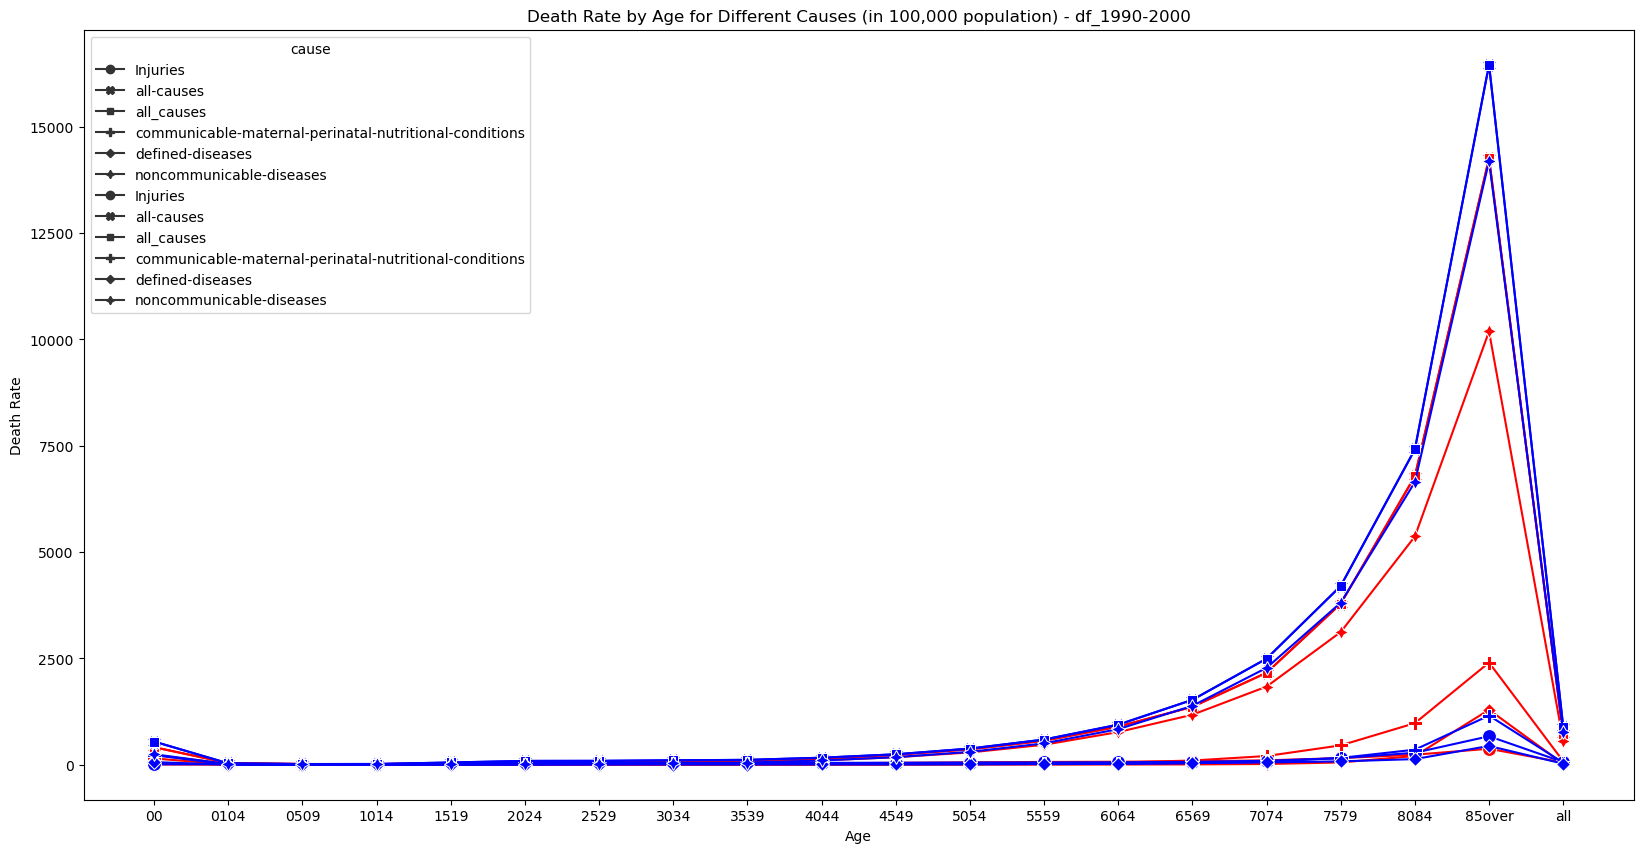

'\nBlue for CHE\nRed for JPN\n\ninjuries : o \nnoncommunicable-diseases : +\nill-defined-diseases : square\ncommunicable-maternal-perinatal-nutritional-conditions: x\n\n'

In [106]:
# Use Seaborn to create a line plot
plt.figure(figsize=(20, 10))  # Set the figure size

# Use seaborn to create a line plot with a different line for each 'cause'
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=dfs['df_1990-2000'][
    # (dfs['df_1990-2000']['cause'] != 'all_causes') & (dfs['df_1990-2000']['cause'] != 'all-causes') &
      (dfs['df_1990-2000']['gender'] == 'All')
],x='age', y='JPN_death_rate',style='cause', markers=True, dashes=False, markersize=10)
sns.lineplot(data=dfs['df_1990-2000'][
    # (dfs['df_1990-2000']['cause'] != 'all_causes') & (dfs['df_1990-2000']['cause'] != 'all-causes') & 
    (dfs['df_1990-2000']['gender'] == 'All')
], x='age', y='CHE_death_rate',style='cause', markers=True, dashes=False, markersize=10)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Death Rate")
plt.title(f"Death Rate by Age for Different Causes (in 100,000 population) - df_1990-2000")

# Show the plot
plt.show()

"""
Blue for CHE
Red for JPN

injuries : o 
noncommunicable-diseases : +
ill-defined-diseases : square
communicable-maternal-perinatal-nutritional-conditions: x

"""


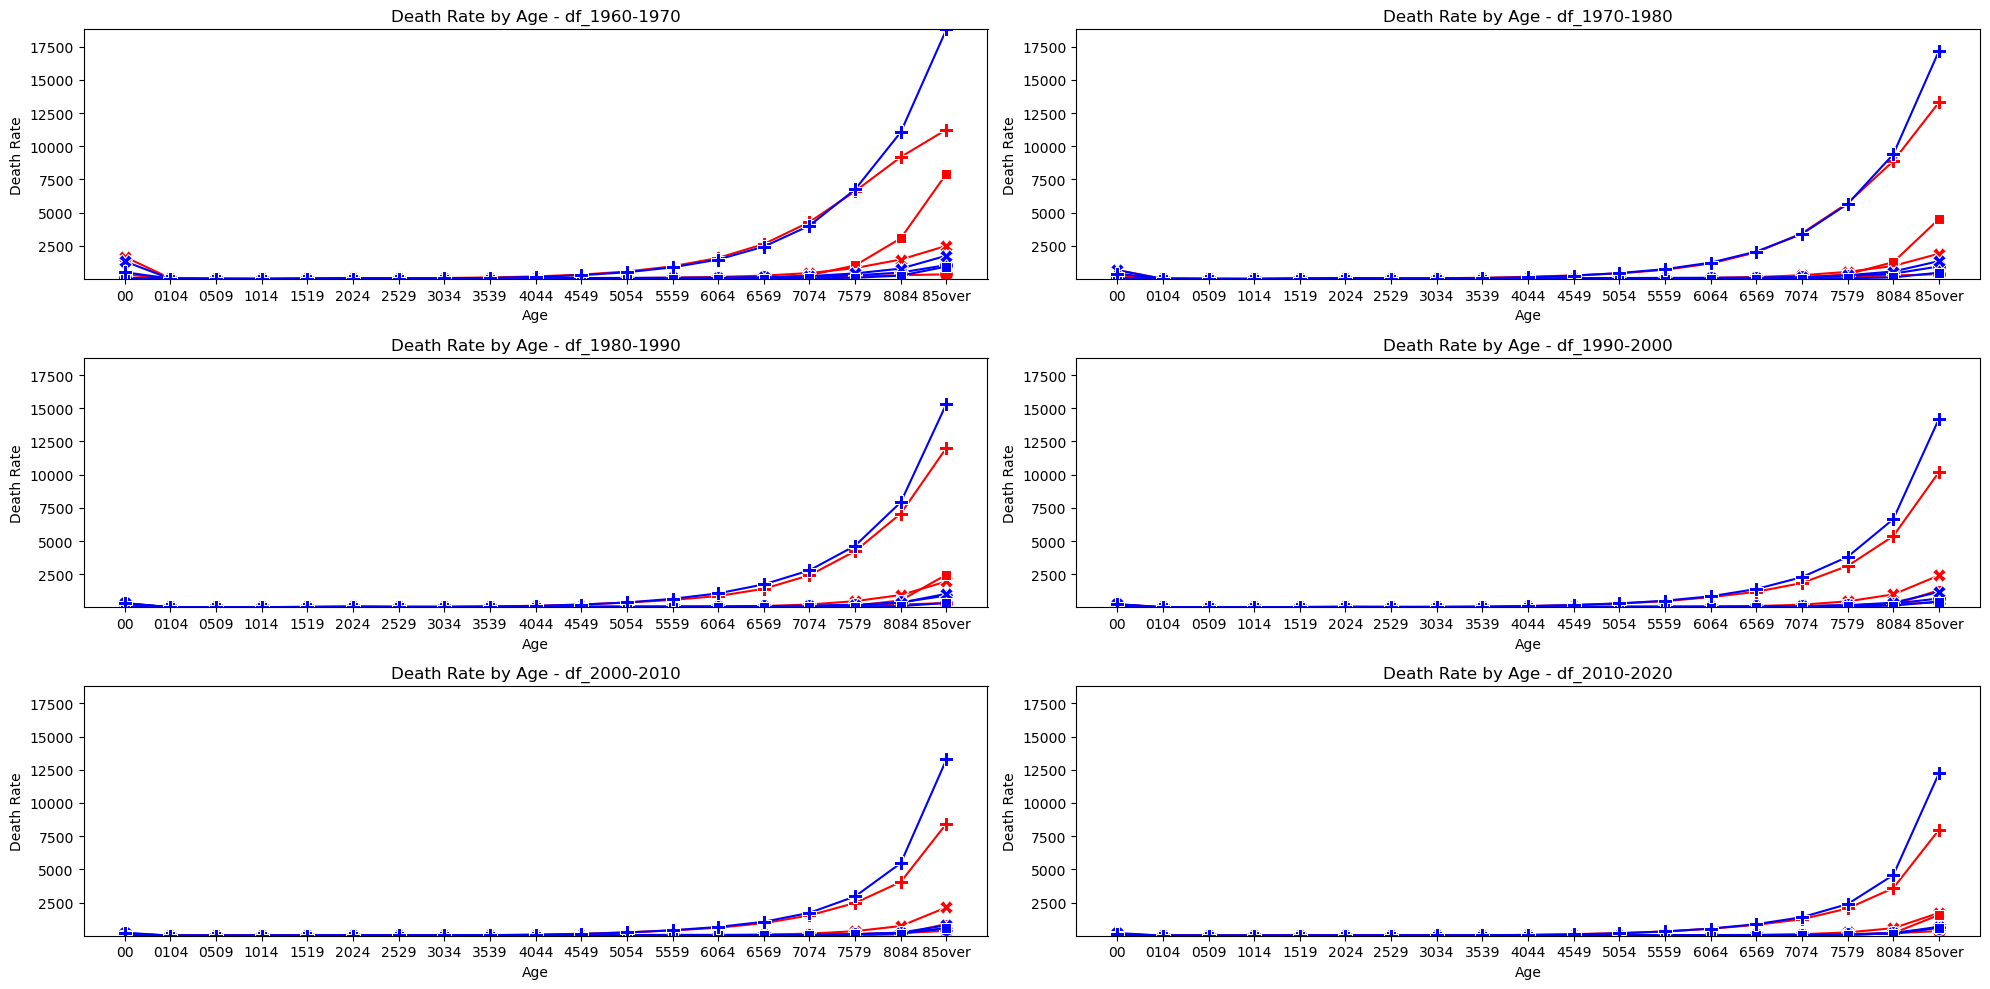

In [14]:

# Define the layout of the subplots (2 rows, 3 columns)
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

# Flatten the 'axes' array for easier iteration
axes = axes.flatten()

# Initialize variables to keep track of the global minimum and maximum y values
global_y_min = float('inf')
global_y_max = float('-inf')

# Iterate through the names and DataFrames in the 'dfs' dictionary
for i, (key, df) in enumerate(dfs.items()):
    # Filter the DataFrame based on your conditions
    filtered_df = df[(df['cause'] != 'all-causes') & (df['cause'] != 'all_causes') & (df['gender'] == 'All') & (df['age'] != 'all')]

    # Determine the y-axis range for this subplot
    local_y_min = filtered_df[['JPN_death_rate', 'CHE_death_rate']].min().min()
    local_y_max = filtered_df[['JPN_death_rate', 'CHE_death_rate']].max().max()

    # Update global y-axis range based on the current subplot
    global_y_min = min(global_y_min, local_y_min)
    global_y_max = max(global_y_max, local_y_max)

    # Create a line plot for JPN_death_rate and CHE_death_rate on the current subplot
    sns.set_palette(["red", "blue"])  # Set color palette for this subplot
    sns.lineplot(data=filtered_df, x='age', y='JPN_death_rate', style='cause', markers=True, dashes=False, markersize=10, ax=axes[i])
    sns.lineplot(data=filtered_df, x='age', y='CHE_death_rate', style='cause', markers=True, dashes=False, markersize=10, ax=axes[i])

    # Remove the legend from the current subplot
    axes[i].get_legend().remove()

    # Set the same y-axis limits for all subplots
    axes[i].set_ylim(global_y_min, global_y_max)

    # Add labels and a title for the current subplot
    axes[i].set_xlabel("Age", fontsize=10)  # Adjust x-axis label font size
    axes[i].set_ylabel("Death Rate")
    axes[i].set_title(f"Death Rate by Age - {key}")

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [15]:
df_age_causes['Year'].unique()

array(['1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010',
       '2010-2020'], dtype=object)

In [16]:
df_age_causes[
          (df_age_causes['Age group code'] == 'Age85_over') &\
               (df_age_causes['Sex'] == "Male") &\
               (df_age_causes['causes'] == 'noncommunicable-diseases') &\
               (df_age_causes['Country Code'] == 'JPN')
            ]['Death rate'].sum()/60

12659.098411716666

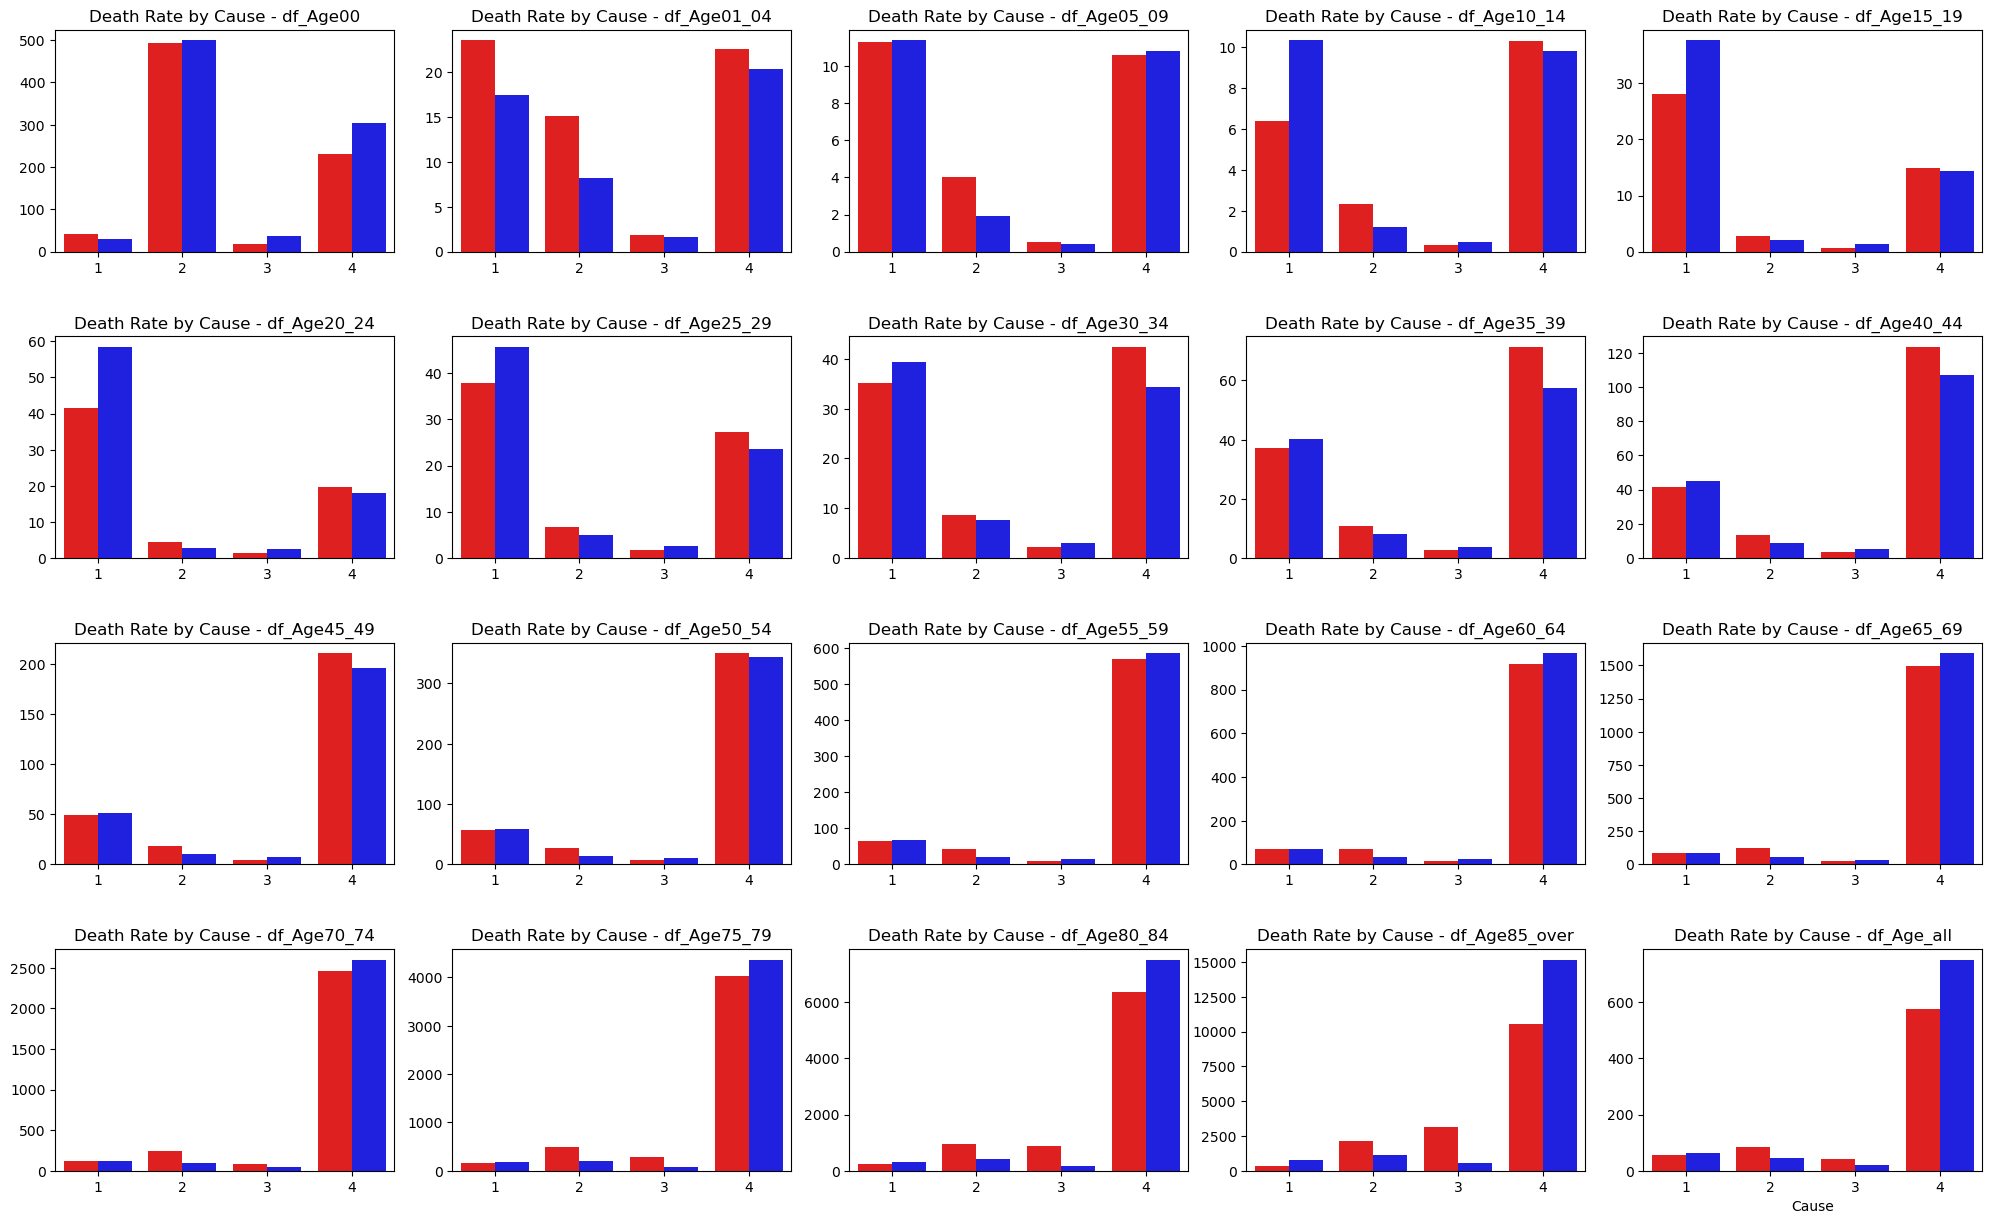

"\n'Injuries',\n'communicable-maternal-perinatal-nutritional-conditions',\n'defined-diseases',\n'noncommunicable-diseases'\n"

In [17]:
# Barchart for each age, causes-death


unique_years = df_age_causes['Year'].unique()
dfs = {}
df_extract = df_age_causes[df_age_causes['Age group code'] == age]



for age in unique_ages :
     df_extract = df_age_causes[df_age_causes['Age group code'] == age]
     df_name = f'df_{age}'
     dfs[df_name] = pd.DataFrame(columns = ['gender','cause','JPN_death_rate','CHE_death_rate'])
     for gender in unique_genders:
          for cause in unique_causes:
               death_jpn = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['causes'] == cause) &\
               (df_extract['Country Code'] == 'JPN')
               ]['Death rate'].sum()/60
               death_che = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['causes'] == cause) &\
               (df_extract['Country Code'] == 'CHE')
               ]['Death rate'].sum()/60
               new_row = {
               'gender':gender,
               'cause':cause,
               'JPN_death_rate':death_jpn,
               'CHE_death_rate':death_che
               }
               dfs[df_name] = dfs[df_name].append(new_row, ignore_index=True)


# Define the layout of the subplots (4 rows, 5 columns)
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
fig.tight_layout(h_pad=4)

# Flatten the 'axes' array for easier iteration
axes = axes.flatten()

# Iterate through the names and DataFrames in the 'dfs' dictionary
for i, (key, df) in enumerate(dfs.items()):
    # Filter the DataFrame based on your conditions
    df = df[(df['cause'] != 'all-causes') & (df['cause'] != 'all_causes') & (df['gender'] == 'All')]

    # Create a long-form DataFrame for plotting
    df_long = df.melt(id_vars=['cause'], value_vars=['JPN_death_rate', 'CHE_death_rate'], var_name='Country', value_name='Death_Rate')

    # Create a bar chart using Seaborn
    sns.set_palette(["red", "blue"])  # Set color palette
    sns.barplot(data=df_long, x='cause', y='Death_Rate', hue='Country', ax=axes[i])

    # Customize the plot
    axes[i].set_xticklabels([1,2,3,4])  # Remove x-axis labels
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(f"Death Rate by Cause - {key}")

    # Remove the legend from the current subplot
    axes[i].get_legend().remove()

# Add a common x-axis label for the last row of subplots
axes[-1].set_xlabel("Cause")

# Show the plots
plt.show()

"""
'Injuries',
'communicable-maternal-perinatal-nutritional-conditions',
'defined-diseases',
'noncommunicable-diseases'
"""

In [41]:
# line chart for age - all-cause
# the average of death rate(all-causes) in all years

df_extract = df_age_causes[df_age_causes['causes'] == 'all-causes']
df_plot = pd.DataFrame(columns = ['gender','age','JPN_death_rate','CHE_death_rate'])
for age in unique_ages :
     for gender in unique_genders:
               death_jpn = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['Age group code'] == age) &\
               (df_extract['Country Code'] == 'JPN')
               ]['Death rate'].sum()/60
               death_che = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['Age group code'] == age) &\
               (df_extract['Country Code'] == 'CHE')
               ]['Death rate'].sum()/60
               new_row = {
               'gender':gender,
               'age':age,
               'JPN_death_rate':death_jpn,
               'CHE_death_rate':death_che
               }
               df_plot = df_plot.append(new_row, ignore_index=True)
               df_plot['age'] = df_plot['age'].apply(lambda x: x.replace("_", "").replace("Age", ""))



In [42]:
df_filtered = df_plot[df_plot['gender'] == "All"]
df_filtered
df_filtered = df_filtered.reset_index(drop=True)
df_filtered = df_filtered.drop(df_filtered.index[-1])
df_filtered

,gender,age,JPN_death_rate,CHE_death_rate
0,All,00,781.422116,868.436500
1,All,0104,63.198763,47.700580
2,All,0509,26.498756,24.522146
3,All,1014,19.360008,21.786966
4,All,1519,46.517995,55.370057
5,All,2024,66.626670,81.494782
6,All,2529,73.587714,76.897437
7,All,3034,88.410487,84.380682
8,All,3539,122.225673,109.057212
9,All,4044,182.293786,165.724616


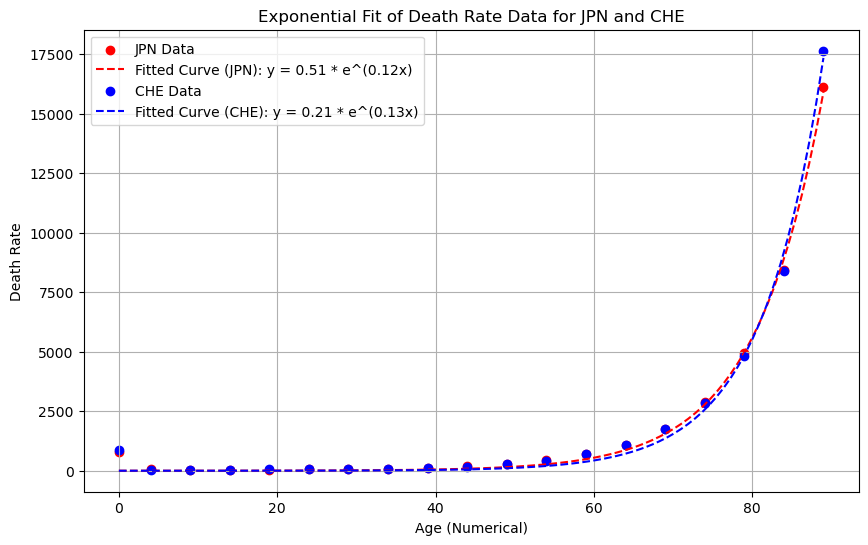

R-squared (JPN): 0.996
R-squared (CHE): 0.994
Correlation (JPN) between Age and Death Rate: 0.67
Correlation (CHE) between Age and Death Rate: 0.65


In [43]:
#converting age groups to integers
for i in range(0,len(df_filtered['age']),) :
     if i > 0 :
          df_filtered.loc[i,'age_linear'] =  4+(i-1)*5
     else:
          df_filtered.loc[i,'age_linear'] = 0


age_groups = df_filtered['age_linear']
death_rates_JPN = df_filtered['JPN_death_rate']
death_rates_CHE = df_filtered['CHE_death_rate']

# Defining the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

#  initial parameter estimates
initial_guess = (1.0, -0.02)  

# Fitting the curve 
params_JPN, covariance_JPN = curve_fit(exponential_function, age_groups, death_rates_JPN, p0=initial_guess)
a_JPN, b_JPN = params_JPN
params_CHE, covariance_CHE = curve_fit(exponential_function, age_groups, death_rates_CHE, p0=initial_guess)
a_CHE, b_CHE = params_CHE

# Create a range of x values for the curve
x_fit = np.linspace(min(age_groups), max(age_groups), 100)
y_fit_JPN = exponential_function(x_fit, a_JPN, b_JPN)
y_fit_CHE = exponential_function(x_fit, a_CHE, b_CHE)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age_groups, death_rates_JPN, label="JPN Data", color='red')
plt.plot(x_fit, y_fit_JPN, 'r', label=f'Fitted Curve (JPN): y = {a_JPN:.2f} * e^({b_JPN:.2f}x)', linestyle='--')
plt.scatter(age_groups, death_rates_CHE, label="CHE Data", color='blue')
plt.plot(x_fit, y_fit_CHE, 'b', label=f'Fitted Curve (CHE): y = {a_CHE:.2f} * e^({b_CHE:.2f}x)', linestyle='--')

plt.xlabel('Age (Numerical)')
plt.ylabel('Death Rate')
plt.legend()
plt.title('Exponential Fit of Death Rate Data for JPN and CHE')
plt.grid(True)
plt.show()

# Calculating the R-squared value for the fit for JPN
y_pred_JPN = exponential_function(age_groups, a_JPN, b_JPN)
ssr_JPN = np.sum((death_rates_JPN - y_pred_JPN) ** 2)  # Sum of squares of residuals
sst_JPN = np.sum((death_rates_JPN - np.mean(death_rates_JPN)) ** 2)  # Total sum of squares
r_squared_JPN = 1 - (ssr_JPN / sst_JPN)

y_pred_CHE = exponential_function(age_groups, a_CHE, b_CHE)
ssr_CHE = np.sum((death_rates_CHE - y_pred_CHE) ** 2)  # Sum of squares of residuals
sst_CHE = np.sum((death_rates_CHE - np.mean(death_rates_CHE)) ** 2)  # Total sum of squares
r_squared_CHE = 1 - (ssr_CHE / sst_CHE)

print(f'R-squared (JPN): {r_squared_JPN:.3f}')
print(f'R-squared (CHE): {r_squared_CHE:.3f}')

# Calculate the correlation 
correlation_JPN = np.corrcoef(age_groups, death_rates_JPN)[0, 1]
print(f'Correlation (JPN) between Age and Death Rate: {correlation_JPN:.2f}')

correlation_CHE = np.corrcoef(age_groups, death_rates_CHE)[0, 1]
print(f'Correlation (CHE) between Age and Death Rate: {correlation_CHE:.2f}')


In [235]:
# bar chart for each cause death rate for all years and all ages
# the average of death rate(all-ages) in all years

df_extract = df_age_causes[df_age_causes['Age group code'] == 'Age_all']
df_plot = pd.DataFrame(columns = ['gender','cause','JPN_death_rate','CHE_death_rate'])
for cause in unique_causes :
     for gender in unique_genders:
               death_jpn = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['causes'] == cause) &\
               (df_extract['Country Code'] == 'JPN')
               ]['Death rate'].sum()/60
               death_che = df_extract[
               (df_extract['Sex'] == gender) &\
               (df_extract['causes'] == cause) &\
               (df_extract['Country Code'] == 'CHE')
               ]['Death rate'].sum()/60
               new_row = {
               'gender':gender,
               'cause':cause,
               'JPN_death_rate':death_jpn,
               'CHE_death_rate':death_che
               }
               df_plot = df_plot.append(new_row, ignore_index=True)

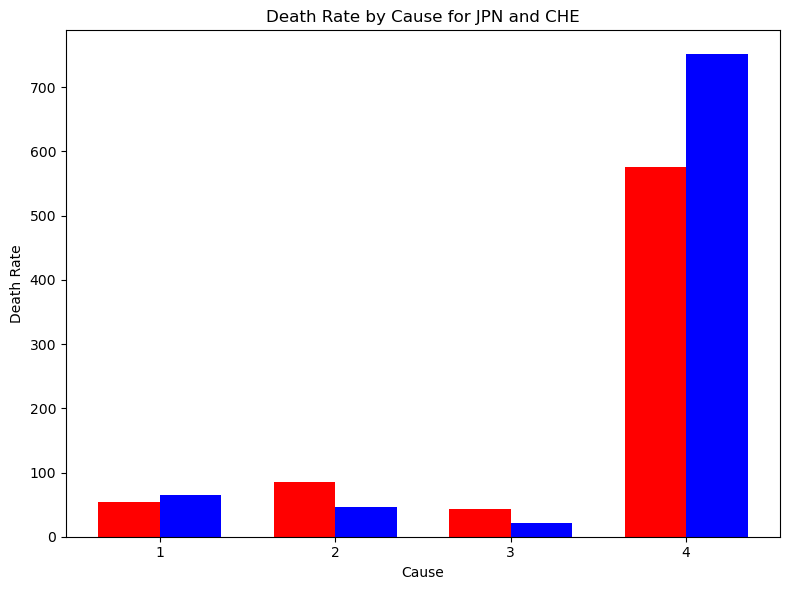

In [236]:


# Filter the DataFrame based on the gender
df = df_plot[(df_plot['gender'] == 'All') & (df_plot['cause'] != 'all-causes') & (df_plot['cause'] != 'all_causes')]

# Set the width of each bar
width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Get the index positions for the x values
x = range(len(df['cause']))

# Create bars for JPN_death_rate and CHE_death_rate
ax.bar(x, df['JPN_death_rate'], width, label='JPN', color='red')
ax.bar([i + width for i in x], df['CHE_death_rate'], width, label='CHE', color='blue')

# Set x-axis labels
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels([1,2,3,4])  # Rotate x-axis labels for readability

# Add labels and legend
ax.set_xlabel('Cause')
ax.set_ylabel('Death Rate')
ax.set_title('Death Rate by Cause for JPN and CHE')


# Show the plot
plt.tight_layout()
plt.show()

# report all-cause just in number'

In [237]:
df

,gender,cause,JPN_death_rate,CHE_death_rate
0,All,Injuries,54.301596,64.688784
9,All,communicable-maternal-perinatal-nutritional-co...,85.543279,46.350579
12,All,defined-diseases,42.567127,21.324024
15,All,noncommunicable-diseases,575.711507,751.135887


In [238]:
def cause_coder(cause):
     if cause == 'Injuries':
          return 1
     elif cause == 'communicable-maternal-perinatal-nutritional-conditions':
          return 2
     elif cause == 'defined-diseases':
          return 3
     elif cause == 'noncommunicable-diseases':
          return 4
     elif cause == 'all-causes':
          return 5
     else :
          return 6  
     
df['cause'] = df['cause'].apply(lambda x : cause_coder(x))
df.to_csv('causes-all-ages.csv')

PermissionError: [Errno 13] Permission denied: 'causes-all-ages.csv'